In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt #diagrams
%matplotlib inline

In [7]:
words = open('activeTrainingMaterial.txt', 'r').read().lower().split()
words[:8]

['a', 'painted', 'christmas', 'an', 'original', 'story', 'of', 'life,']

In [8]:
len(words)

154361

In [623]:
#build vocabulary
chars = sorted(list(set(''.join(words))))
characterCount = len(chars)
print(f"{characterCount} chars found")
stoi = {s:i+1 for i,s in enumerate(chars)}
spotIdx = stoi['.']
spotEndIdx = stoi['∫']
stoi['.'] = 0
stoi['∫'] = spotIdx
itos = {i:s for s,i in stoi.items()}
print(itos)

61 chars found
{1: '\x03', 2: '!', 3: '"', 4: '#', 5: '$', 6: '%', 7: '&', 8: "'", 9: '(', 10: ')', 11: '*', 12: ',', 13: '-', 0: '.', 15: '/', 16: '0', 17: '1', 18: '2', 19: '3', 20: '4', 21: '5', 22: '6', 23: '7', 24: '8', 25: '9', 26: ':', 27: ';', 28: '?', 29: '[', 30: ']', 31: '_', 32: 'a', 33: 'b', 34: 'c', 35: 'd', 36: 'e', 37: 'f', 38: 'g', 39: 'h', 40: 'i', 41: 'j', 42: 'k', 43: 'l', 44: 'm', 45: 'n', 46: 'o', 47: 'p', 48: 'q', 49: 'r', 50: 's', 51: 't', 52: 'u', 53: 'v', 54: 'w', 55: 'x', 56: 'y', 57: 'z', 58: '‘', 59: '’', 60: '…', 14: '∫'}


In [870]:
#build dataset
block_size = 3 #context length for prediction
X, Y = [], []
for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix] #crop and append
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [234]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([977944, 3]), torch.int64, torch.Size([977944]), torch.int64)

In [957]:
#build the dataset

def buildDataset(words):
    block_size = 3  #context for prediction
    X, Y = [], []
    for w in words:
        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '---->', itos[ix])
            context = context[1:] + [ix] #crop and append
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(327)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = buildDataset(words[:n1])
Xdev, Ydev = buildDataset(words[n1:n2])
Xte, Yte = buildDataset(words[n2:])


#run the function
buildDataset(words)

torch.Size([782105, 3]) torch.Size([782105])
torch.Size([98032, 3]) torch.Size([98032])
torch.Size([97807, 3]) torch.Size([97807])
torch.Size([977944, 3]) torch.Size([977944])


(tensor([[ 0,  0,  0],
         [ 0,  0, 38],
         [ 0, 38, 46],
         ...,
         [34, 42, 52],
         [42, 52, 47],
         [52, 47, 12]]),
 tensor([38, 46, 51,  ..., 47, 12,  0]))

In [958]:
C = torch.randn((characterCount, 2))

In [139]:
C[5]

tensor([0.8194, 0.4489])

In [710]:
F.one_hot(torch.tensor(5), num_classes=characterCount).float() @ C

tensor([ 0.6026, -1.5028])

In [396]:
C[X].shape

torch.Size([977944, 8, 2])

In [397]:
C[X][13,2]

tensor([ 0.0932, -2.7909])

In [873]:
emb = C[X]
emb.shape

torch.Size([977944, 3, 2])

In [874]:
numNeurons = 10
W1 = torch.randn((3*numNeurons, numNeurons))
b1 = torch.randn(numNeurons)

In [434]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (7823552x2 and 1500x500)

In [361]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]],1 ).shape

torch.Size([977944, 6])

In [362]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([977944, 14])

In [834]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [51]:
a.shape

torch.Size([18])

In [53]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [ ]:
a.untyped_storage()

In [653]:
emb.view(-1, 3*numNeurons) @ W1 + b1

RuntimeError: shape '[-1, 30]' is invalid for input of size 5867664

In [632]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

RuntimeError: shape '[-1, 6]' is invalid for input of size 9779440

In [ ]:
h

In [875]:
W2 = torch.randn(numNeurons, characterCount)
b2 = torch.randn(characterCount)

In [848]:
logits = h @ W2 + b2

RuntimeError: mat1 and mat2 shapes cannot be multiplied (40x10 and 5x61)

In [438]:
logits.shape

torch.Size([1, 61])

In [836]:
counts = logits.exp()

In [837]:
prob = counts / counts.sum(1, keepdims=True)

In [838]:
prob.shape

torch.Size([32, 61])

In [407]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#rewritten from above for clarity
X.shape, Y.shape #dataset

(torch.Size([977944, 8]), torch.Size([977944]))

In [954]:
nembd = 16

#-
emb = C[Xtr[ix]]  # Should be [32, 3, 2] # Check if elements align before reshaping
total_elements = emb.numel()  # Should be 32 * 3 * 2 = 192
new_shape = (-1, 3 * nembd)  # Should lead to (-1, 6) ensuring 192 elements fit
#-

if total_elements % (3 * nembd) != 0:
    raise ValueError("Mismatch in reshaping elements with the current nembd")

C = torch.randn((characterCount, nembd))

W1 = torch.randn((3*nembd,numNeurons), requires_grad=True)
b1 = torch.randn(numNeurons, requires_grad=True)

W2 = torch.randn((numNeurons, characterCount), requires_grad=True)
b2 = torch.randn(characterCount, requires_grad=True)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

lre = torch.linspace(-3, 0, 1000) #0.001 -> -3,    1 -> 0
lrs = 10**lre

In [644]:
sum(p.nelement() for p in parameters) #number of parameters in total for this model

42361

In [598]:
for p in parameters:
    p.requires_grad = True

In [266]:
lre = torch.linspace(-3, 0, 1000) #0.001 -> -3,    1 -> 0
lrs = 10**lre

In [119]:
#counts = logits.exp()
#prob = counts / counts.sum(1, keepdims=True)
#loss = -prob[torch.arange(32), Y].log().mean()
#loss  #use cross entropy function to do this in a more efficient way

2.413818359375


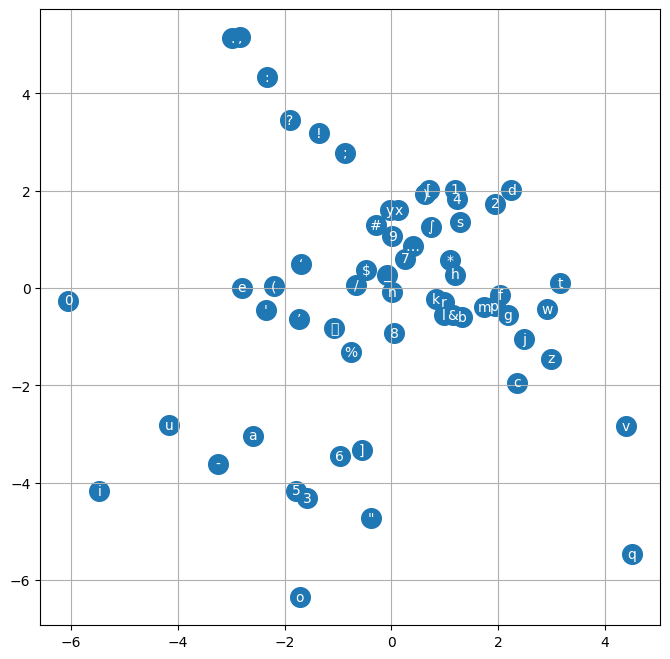

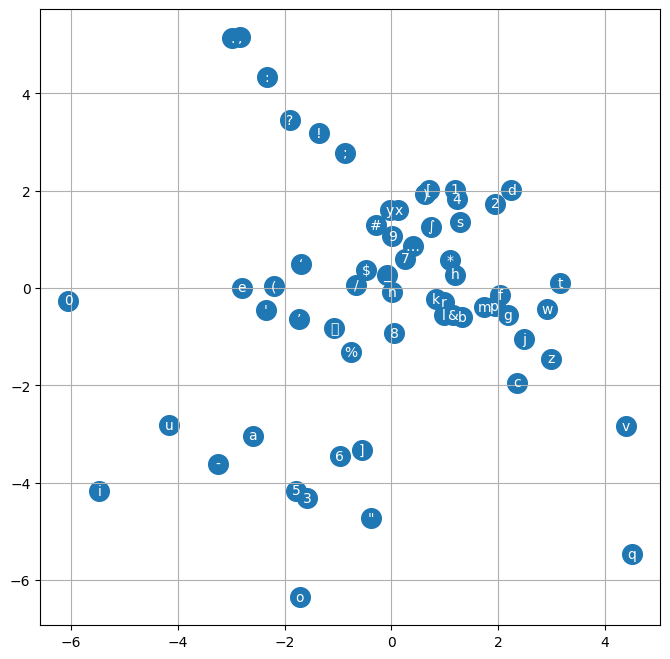

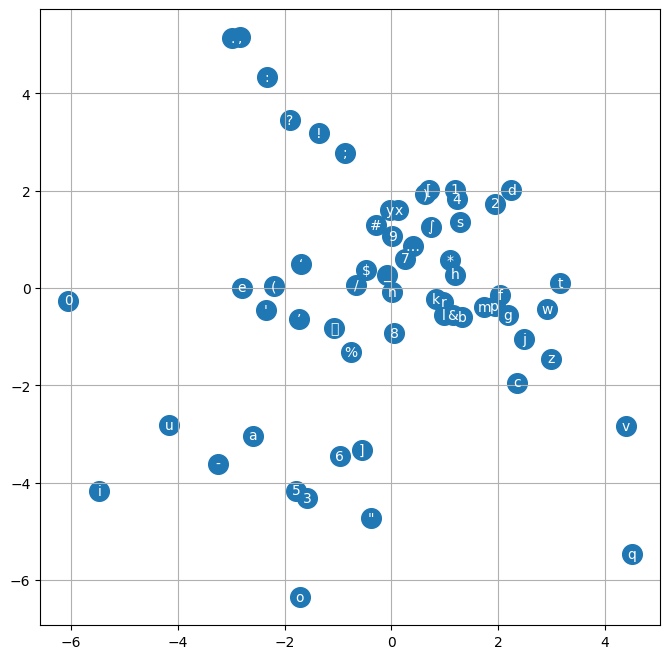

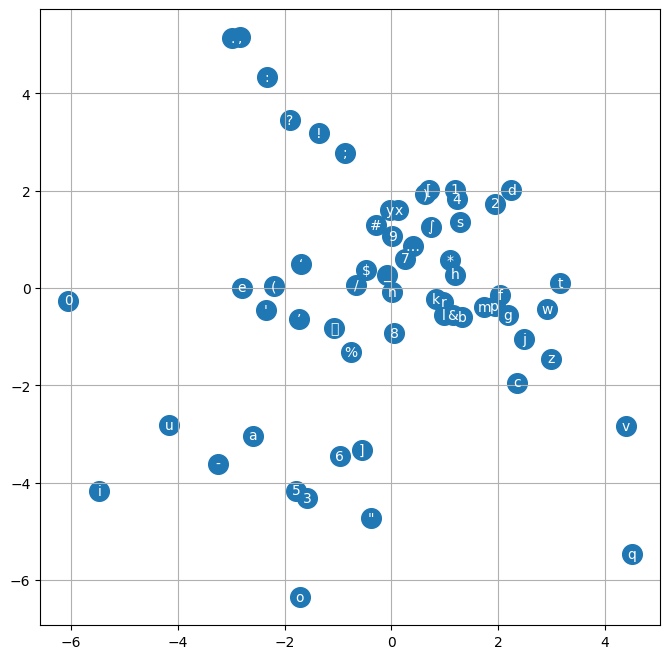

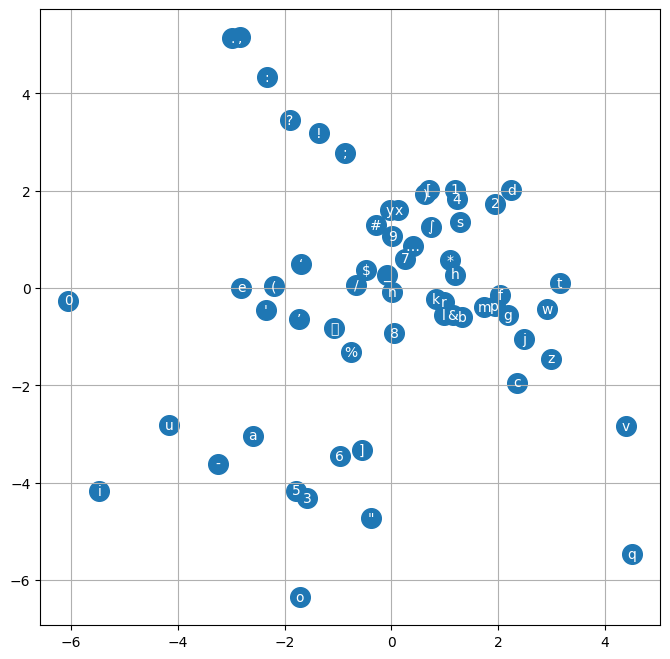

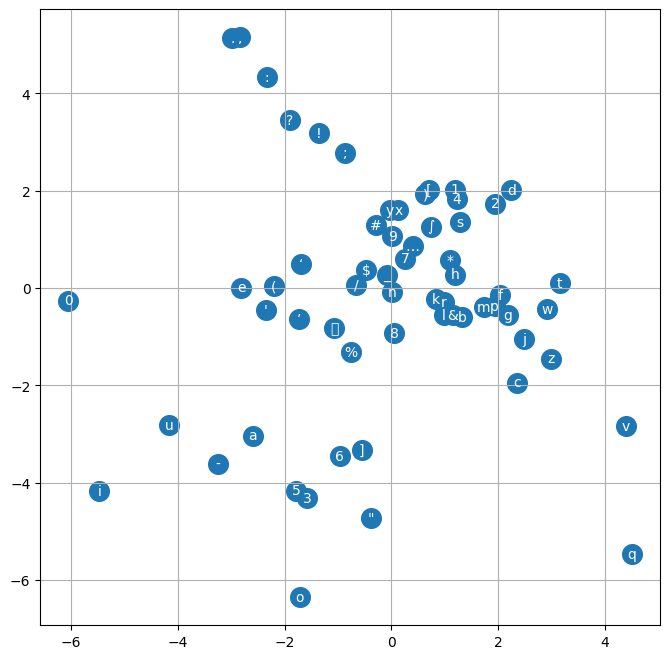

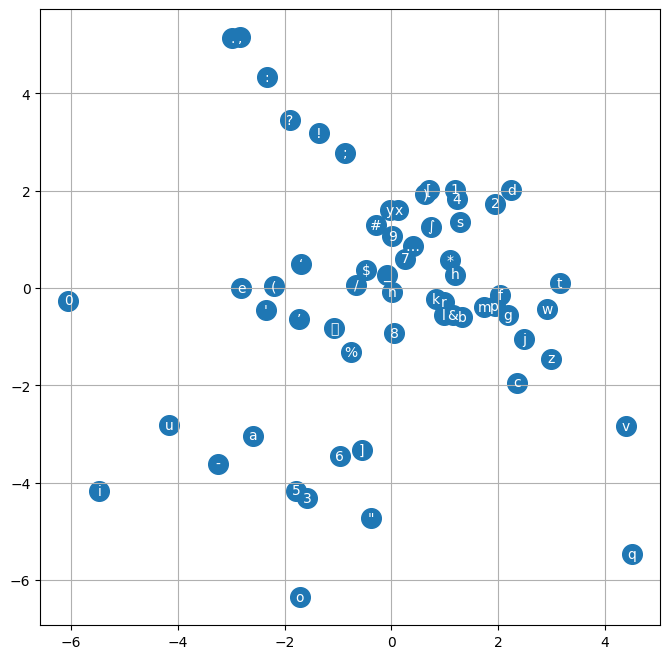

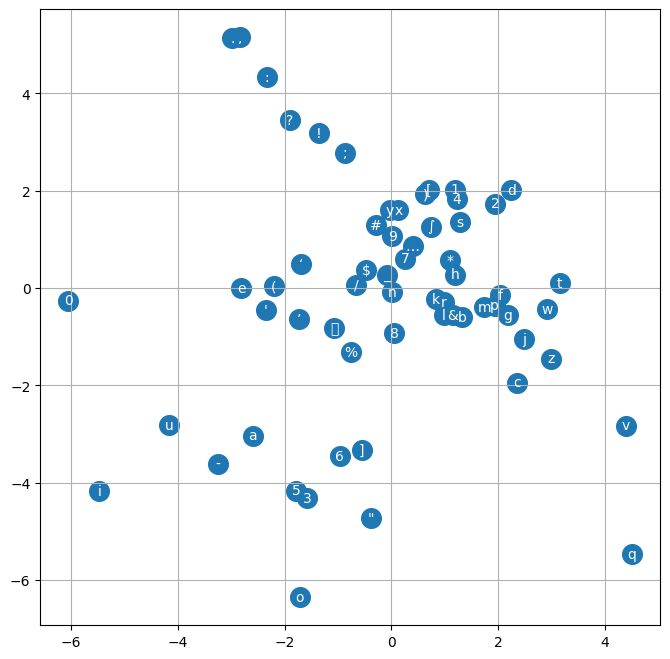

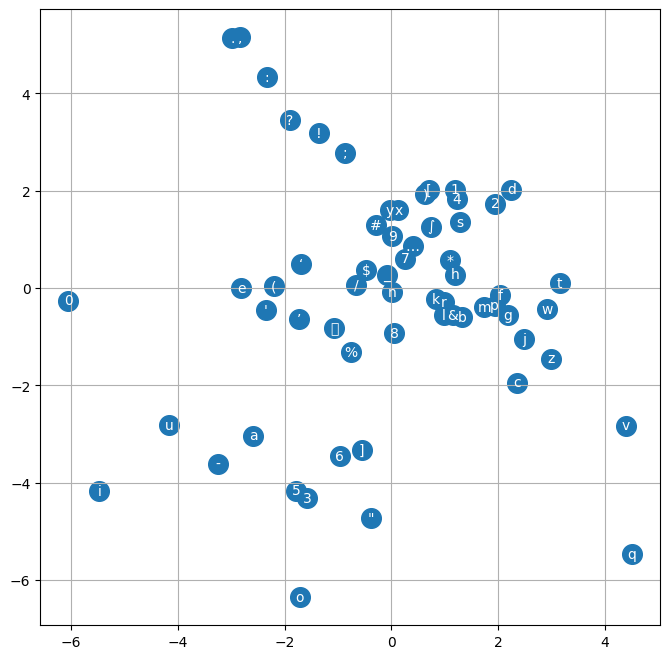

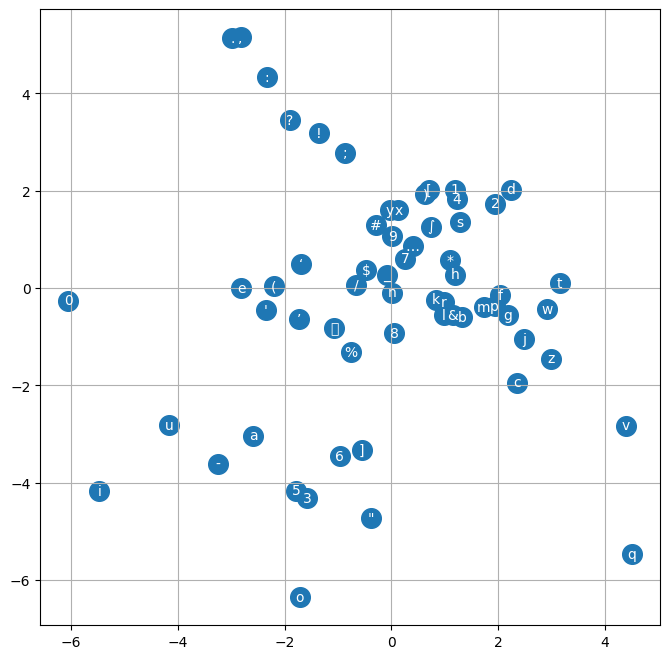

In [951]:
trainingIterations = 500000
lri = []
lossi = []
stepi = []
batch_size = 48
for i in range(trainingIterations):
    if (i > 0 and batch_size % i == 0):
        plt.figure(figsize=(8,8))
        plt.scatter(C[:, 0].data, C[:,1].data, s=200)
        for i in range(C.shape[0]):
            plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
        plt.grid('minor')

    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (batch_size,))
    
    #forward pass
    emb = C[Xtr[ix]] #[32, 3, 2)
    h = torch.tanh(emb.view(-1, block_size*nembd) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, characterCount)
    #print(f"Logits shape: {logits.shape}")
    #print(f"Target shape: {Ytr[ix].shape}") 
    loss = F.cross_entropy(logits, Ytr[ix]) #IT MUST USE CROSS_ENTROPY
    #print(loss.item())
    
    
    
    #backward pass
    for p in parameters:
        if not p.requires_grad:
            print(f"Parameter {p} does not require gradients.")
        p.grad = None
    loss.backward() 
    
    #update model
    #lr = lrs[i]
    lr = 0.01 #initial version
    #lr = 0.1 #decay version - after initial
    for p in parameters:
        if p.grad is not None:
            p.data += -lr * p.grad

    #track stats  to deterine learning rate
    #lri.append(lre[i])
    #lossi.append(loss.item())
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())



In [950]:
#P = C.float()
#P /= P.sum(1, keepdim=True)

#generate
for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])] #(1,block_size,d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, replacement=True).item() #, replacement=True)
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    #print(''.join(out) + '.')   
    output = ''.join(itos[i] for i in out).replace('.', ' ')
    print(output, end='', flush=True)

gend thanon adt udhers girgong andsris lon thiengued and: thiyenices qandthan sralt noredcacivwl a thetherigh dathyd os kate, andt omhs 

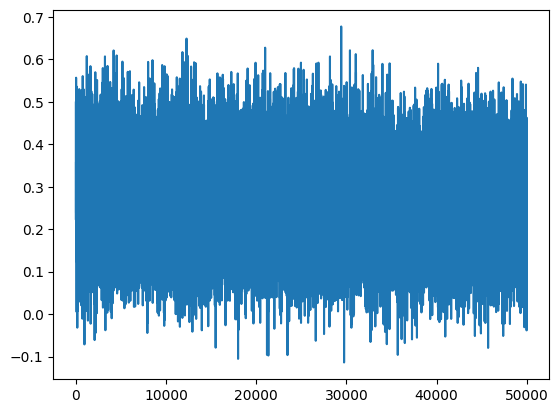

In [291]:
#plt.plot(lri, lossi)

plt.plot(stepi, lossi)

In [ ]:
plt.plot(lri, lossi)

In [917]:
#dev loss
emb = C[Xdev] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 3*nembd ) @ W1 + b1) #(32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3018, grad_fn=<NllLossBackward0>)

In [918]:
#train loss
emb = C[Xtr] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 3*nembd ) @ W1 + b1) #(32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3075, grad_fn=<NllLossBackward0>)

In [919]:
#test loss - use sparingly
emb = C[Xte] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 3*nembd ) @ W1 + b1) #(32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.3089, grad_fn=<NllLossBackward0>)

In [162]:
Y

tensor([32,  0, 47,  ..., 50,  0,  0])

In [229]:
torch.randint(0, X.shape[0], (32,))

tensor([152536, 485750, 832209, 113806, 442746, 775512, 408267, 749032, 515622,
        394481, 201762, 850851, 117641, 735334, 339746, 737163, 503033, 972591,
        616198, 727606, 525207, 812264, 176795, 469394, 253640, 790644, 765318,
        947235, 192347, 401130, 692539, 683726])

In [281]:
#training split (train) dev/validation split (test hyperparams), test split (test on new data)

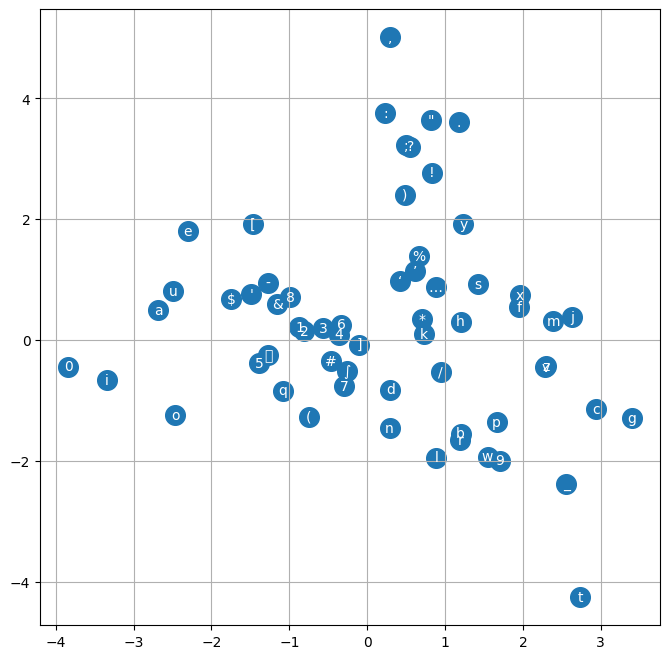

In [921]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')